# Read & Write to a real-time Database to a server using Firebase

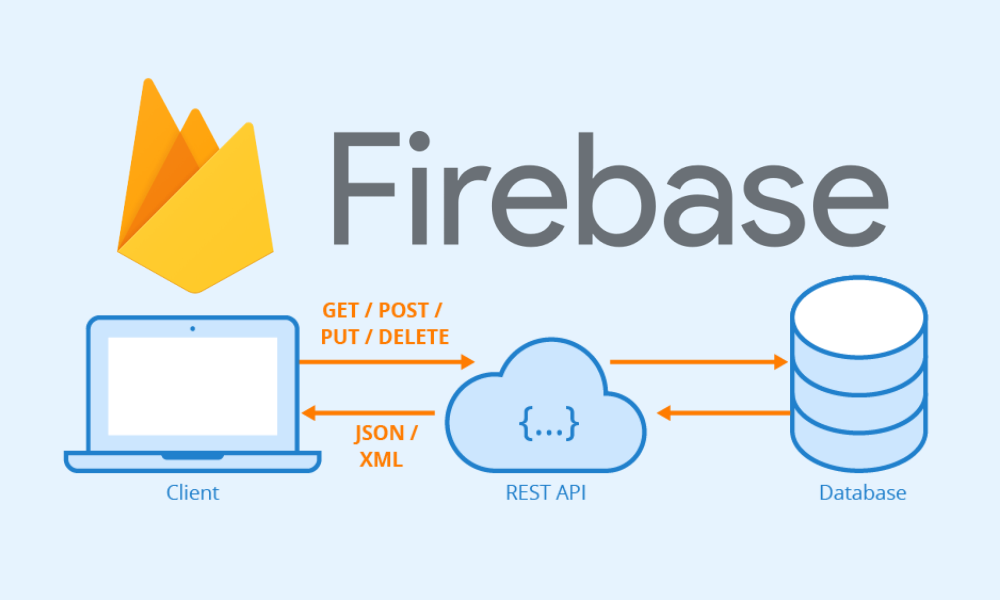

- **Problem statement :** Let’s CRUD (Create Read Update Delete) to a real-time Database server like Firebase
___

- import the necessary packages

In [1]:
!pip install firebase 

In [2]:
import firebase_admin        #from firebase import Firebase

In [3]:
from firebase_admin import credentials
from firebase_admin import firestore

- Create an account in firebase and create a project inside it.
- Then pass the credentials of your firebase in credentials.Certificate()  and pass the credentials() variable in initialize() to connect your python program to your firebase account. Then create the variable to access the firebase account

In [4]:
#Download the credential key from the firebase & place it in the project folder
cred = credentials.Certificate("python-project-using-firebase-firebase-adminsdk-rcgpg-019d7a36bd.json")
firebase_admin.initialize_app(cred)

In [5]:
db = firestore.client()

- Now to upload data in the firebase. Create a collection for saving the data in the collections . Then create a dictionary to which needs to be uploaded in the firebase collection using set()

In [6]:
doc_ref = db.collection(u'Indian').document(u'Industrialist')
doc_ref.set({
    u'first': u'Ratan',
    u'last': u'Tata',
    u'born': 1939
})


update_time {
  seconds: 1617878460
  nanos: 847628000
}

In [7]:
def enterDataInDB(name,lastName,age):
    doc_ref = db.collection(u'Footballers').document()
    dit = {}
    dit["firstName"] = name
    dit["lastName"] = lastName
    dit["age"] = age
    
    doc_ref.set(dit)
    

In [8]:
enterDataInDB("Ronaldinho","Gaucho",40)  

In [9]:
enterDataInDB("Lionel","Messi",33)

In [10]:
enterDataInDB("Cristiano","Ronaldo",36)

In [11]:
enterDataInDB("Diego","Maradona",60)

In [12]:
enterDataInDB("Ricardo","Kaka",38)

In [13]:
enterDataInDB("Robin Van","Persie",37)  

In [14]:
#modifications for taking Input From User

def enterDataInDB():
    doc_ref = db.collection(u'Footballers').document()
    
    name = input("Enter Name - ")
    lastName = input("Enter Last Name - ")
    age = int(input("Enter Age - "))
    
    dit = {}
    dit["firstName"] = name
    dit["lastName"] = lastName
    dit["age"] = age
    
    doc_ref.set(dit)
    

In [15]:
enterDataInDB()

Enter Name - Zlatan
Enter Last Name - Ibrahimovic
Enter Age - 39


- You can also read data from the database.Using .stream() on the collection() you can able to get the data from the firebase store it inside a variable. Iterate through the variable to get each element in the data 

In [16]:
#Read data from Firebase DB ( Firestore )

docs = db.collection(u'Footballers').stream()

for doc in docs:
   # print(f'{doc.id} => {doc.to_dict()}')
    
    print("ID - ", doc.id)
    
    print("First Name - ", doc.to_dict().get("firstName"))
    print("Last Name - ", doc.to_dict().get("lastName"))
    print("Age - ", doc.to_dict().get("age") )
    
    print("---------------")
    print("---------------")

ID -  1ch4hTK8mq9fvnBuUDkI
First Name -  Ronaldinho
Last Name -  Gaucho
Age -  40
---------------
---------------
ID -  TAC4roF49tOe4rkJoQHD
First Name -  Diego
Last Name -  Maradona
Age -  60
---------------
---------------
ID -  Tdkudvqfi2KuKUjEsoo9
First Name -  Ricardo
Last Name -  Kaka
Age -  38
---------------
---------------
ID -  dkM0nLpU1GQboFWi6lMd
First Name -  Lionel
Last Name -  Messi
Age -  33
---------------
---------------
ID -  fn6VhJODbezJ8SuyqRXw
First Name -  Zlatan
Last Name -  Ibrahimovic
Age -  39
---------------
---------------
ID -  hZ8mMRzEzc1CTBr8tDbF
First Name -  Cristiano
Last Name -  Ronaldo
Age -  36
---------------
---------------
ID -  l0pxzv5xgOzB0OOpmJhH
First Name -  Robin Van
Last Name -  Persie
Age -  37
---------------
---------------


- Now the third operation is to update existing data. This can be done by using the data-id and pass it in documents()  on the collection(). Then pass a dictionary which contains the elements to be updated in update().

In [17]:
#Update a Entry -> 

def updateDatainFirebase(uid, updatedAge):
    doc_ref = db.collection(u'Footballers').document(uid)
    
    doc_ref.update({"age":updatedAge})

In [18]:
updateDatainFirebase("Tdkudvqfi2KuKUjEsoo9",36)

In [19]:
updateDatainFirebase("fn6VhJODbezJ8SuyqRXw",42)

- Finally to delete a collection Use delete() with the document(ID) inside the collection.

In [20]:
# Delete Data from Firebase 

def deleteDataInFirebase(uid):
    db.collection(u'Footballers').document(uid).delete()

In [21]:
deleteDataInFirebase("Tdkudvqfi2KuKUjEsoo9")